### 1. Get and Prepare data

In [ ]:
# Cài đặt một số thư viện nếu chưa cài
#!pip install tensorflow matplotlib pandas numpy

#### 1.1 Import

In [2]:
# Import thư viện tensorflow, chỉ dùng để get data
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
# Get data train và test
(train_images, train_labels), (test_images, test_labels) = (
    tf.keras.datasets.mnist.load_data()
)

#### 1.2 Feature

In [4]:
# Lấy hình đầu tiên
# Mỗi pixel là một màu
# Mỗi màu được đại diện bởi 8 bit, ví dụ màu đen biểu diễn bởi 8 bit 0: 00000000b = 0, màu trắng là 8 bit 1: 11111111b = 255
# Mỗi bit có 2 giá trị là 0 và 1, suy ra có 2^8 = 256 cách biểu diễn 1 màu
# Mỗi pixel là một số đại diện cho màu, ví dụ pixel có giá trị 175 là đại diện cho màu xám, được lưu ở dạng bit: 10101111b
img = train_images[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# Màu của hình trải dài từ đen đến trắng (hình đen trắng)
# Một hình có 28 pixel hàng * 28 pixel cột = 784 pixel
img.shape, img[6]

((28, 28),
 array([  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0], dtype=uint8))

img_label: 5


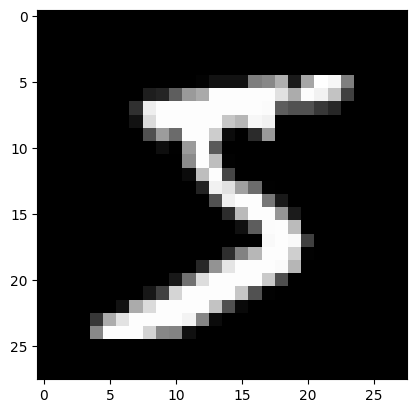

In [6]:
# Hiển thị một hình ảnh đầu tiên
import matplotlib.pyplot as plt

plt.imshow(img, cmap="gray")  # Grays, Blue
img_label = train_labels[0]
print(f"img_label: {img_label}")

In [7]:
# Shape của train_images, mỗi hình là một matrix bậc 2, 28 hàng và 28 cột. Có tổng cộng 60000 hình ở tệp train_images
img.shape, train_images.shape

((28, 28), (60000, 28, 28))

In [8]:
# Encode train_images về khoảng [0-1] bằng cách chia cho 255
img = img / 255.0

In [9]:
# View data của hình đầu tiên (index=0), hàng thứ 6
img[6], train_images[0, 6]

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.11764706, 0.14117647,
        0.36862745, 0.60392157, 0.66666667, 0.99215686, 0.99215686,
        0.99215686, 0.99215686, 0.99215686, 0.88235294, 0.6745098 ,
        0.99215686, 0.94901961, 0.76470588, 0.25098039, 0.        ,
        0.        , 0.        , 0.        ]),
 array([  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0], dtype=uint8))

In [10]:
# Encode cho cả tập train và test
train_images = train_images / 255.0
test_images = test_images / 255.0

# Image 0, row 6
train_images[0, 6]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.11764706, 0.14117647,
       0.36862745, 0.60392157, 0.66666667, 0.99215686, 0.99215686,
       0.99215686, 0.99215686, 0.99215686, 0.88235294, 0.6745098 ,
       0.99215686, 0.94901961, 0.76470588, 0.25098039, 0.        ,
       0.        , 0.        , 0.        ])

Image of number 3 after normalization \
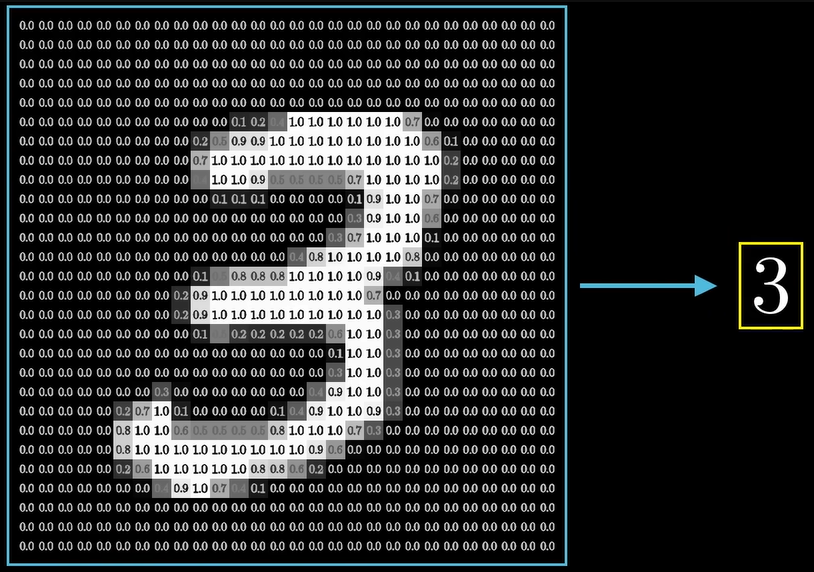

In [11]:
# Chuyển từ matrix 2 chiều 28 hàng * 28 cột về 1 chiều 784 giá trị
train_images = train_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)

train_images.shape, test_images.shape

((60000, 784), (10000, 784))

#### 1.3 Label

In [12]:
# Label là một số từ 0 đến 9, ví dụ số 7
# Shape của test_labels, mỗi label là một số (integer) tương ứng với giá trị của một hình
# Tệp test_labels là gồm 10000 số tương ứng với label của 10000 hình test
img_label.shape, img_label, test_labels.shape

((), 5, (10000,))

In [13]:
# Lấy ra label thứ nhất trong tổng số 10000 train label
train_labels[0]

5

In [14]:
# Chuyển về one-hot encode cho cả train label và test label
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
train_labels[0], test_labels[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]))

### 2. Train

#### 2.1 Khởi tạo các parameter w và h cho các layers

**Input** là layer 784 node \
**Hidden** là layer có 20 node \
**Outout** là layer 10 node, mỗi node tương ứng với giá trị của số từ 0 đến 9

In [15]:
# Initialize weights and biases
# Input -> hidden layer
# y = Wx + b
# y (20,1) = W (20,784) . x (784,1) + b (20, 1)
# Số parameter = W + b = 20x784 + 20 = 15700

w_i_h = np.random.uniform(-0.5, 0.5, (20, 784))
b_i_h = np.zeros((20, 1))

# Hidden -> output
# y = Wx + b
# y (10,1) = W (10,20) . x (20,1) + b (10, 1)
# Số parameter = W + b = 10x20 + 10 = 210

w_h_o = np.random.uniform(-0.5, 0.5, (10, 20))
b_h_o = np.zeros((10, 1))

# Training parameters
learn_rate = 0.01
epochs = 3

In [16]:
# hiển thị một phần các thông số đã khởi tạo
w_i_h[:2, 0:3], b_i_h[0:5], w_h_o[:2, 0:3], b_h_o[0:5]

(array([[ 0.26022849, -0.23499153, -0.22651001],
        [ 0.46651259, -0.45614836,  0.1400511 ]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[ 0.37190554,  0.086171  , -0.48510719],
        [ 0.24898605, -0.00101205, -0.03957414]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

Dùng w và h đã khởi tạo ở trên để thử cho hình đầu tiên

In [17]:
nr_correct = 0

# Lấy hình đầu tiên
img = train_images[0]
l = train_labels[0]

print(f"l = {l}")

img = img.reshape(-1, 1)
l = l.reshape(-1, 1)
print(f"l.shape = {l.shape}")
print(f"img.shape = {img.shape}")

l = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
l.shape = (10, 1)
img.shape = (784, 1)


In [18]:
# Tính toán giá trị h_pre
# Forward propagation: input -> hidden
h_pre = w_i_h @ img + b_i_h
print(f"h_pre = {h_pre}")

h_pre = [[ 0.70807646]
 [ 0.91537907]
 [ 4.33629459]
 [ 1.3452551 ]
 [-1.59659245]
 [ 0.28709087]
 [-1.73332204]
 [-3.98484991]
 [ 2.67399932]
 [-5.39333356]
 [ 4.63625396]
 [-0.00876596]
 [ 2.4025389 ]
 [ 1.92299606]
 [ 2.85341319]
 [-1.02212115]
 [-1.03842654]
 [-0.96075141]
 [ 1.96505824]
 [-5.22030501]]


In [19]:
# Sau khi tính được h_pre thì tính giá trị của h bằng cách dùng hàm sigmoid
# Giá trị output của hàm sigmoid là giá trị nằm trong đoạn từ 0 đến 1
# apply sigmoid activation
h = 1 / (1 + np.exp(-h_pre))
print(f"h = {h}")

h = [[0.66997599]
 [0.71409963]
 [0.98708408]
 [0.79335281]
 [0.16845841]
 [0.57128378]
 [0.15016315]
 [0.01825576]
 [0.93547486]
 [0.00452621]
 [0.99039913]
 [0.49780852]
 [0.9170207 ]
 [0.87247216]
 [0.94549485]
 [0.26461443]
 [0.26145371]
 [0.27672778]
 [0.87707933]
 [0.00537662]]


In [20]:
# Tương tự, tính toán giá trị o_pre
# Forward propagation: hidden -> output
o_pre = w_h_o @ h + b_h_o
print(f"o_pre = {o_pre}")

o_pre = [[-1.26799356]
 [ 0.11865503]
 [-0.1761025 ]
 [ 0.03401623]
 [ 0.05275163]
 [ 0.37947019]
 [-0.9789784 ]
 [-1.05060782]
 [ 1.54646993]
 [-0.21368081]]


In [21]:
# Sau khi tính được o_pre thì tính giá trị của o bằng cách dùng hàm sigmoid
# apply sigmoid activation function
o = 1 / (1 + np.exp(-o_pre))
print(f"o = {o}")

o = [[0.21960092]
 [0.529629  ]
 [0.4560878 ]
 [0.50850324]
 [0.51318485]
 [0.59374531]
 [0.27309454]
 [0.2591084 ]
 [0.8244033 ]
 [0.44678214]]


In [22]:
# display label thứ nhất
print(f"l = {l}")

l = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


Với kết quả trên giá trị lớn nhất của `o` chính là giá trị mà mô hình dự đoán\
Giá trị của `l` chính là giá trị của label\
Như kết quả, lần đầu tiên gần như không bao giờ chính xác, vì số `w` và `h` là ngẫu nhiên

In [23]:
print(f"predict: {np.argmax(o)}")
print(f"actual: {np.argmax(l)}")

predict: 8
actual: 5


In [24]:
# hiển thị một phần các thông số w và h
# ta thấy cần phải update các số w và h để mô hình hoạt động chính xác hơn.
w_i_h[:2, 0:3], b_i_h[0:5], w_h_o[:2, 0:3], b_h_o[0:5]

(array([[ 0.26022849, -0.23499153, -0.22651001],
        [ 0.46651259, -0.45614836,  0.1400511 ]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[ 0.37190554,  0.086171  , -0.48510719],
        [ 0.24898605, -0.00101205, -0.03957414]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

Quá trình update các số w và h, sử dụng phương pháp Backpropagation (lan truyền ngược)

In [25]:
# Update weights và biases cho tầng cuối cùng là w_h_o và b_h_o

# Backpropagation
# Calculate Error in Output Layer (delta_o):
delta_o = o - l
print(f"delta_o = {delta_o}")

delta_o = [[ 0.21960092]
 [ 0.529629  ]
 [ 0.4560878 ]
 [ 0.50850324]
 [ 0.51318485]
 [-0.40625469]
 [ 0.27309454]
 [ 0.2591084 ]
 [ 0.8244033 ]
 [ 0.44678214]]


In [26]:
# Update Weights and Biases for Output Layer (w_h_o and b_h_o):
w_h_o = w_h_o - learn_rate * delta_o @ h.T
b_h_o = b_h_o - learn_rate * delta_o

# giá trị của w_h_o và b_h_o sau khi update
print(f"w_h_o = {w_h_o}")
print(f"b_h_o = {b_h_o}")

w_h_o = [[ 0.37043426  0.08460283 -0.48727484 -0.1800697  -0.40766718 -0.46819159
   0.45279603  0.03956577 -0.26829209  0.07631669  0.1125646  -0.39844895
  -0.4104813  -0.48282489 -0.16354143  0.36458153  0.14422257  0.14872075
   0.46791412  0.00498381]
 [ 0.24543766 -0.00479413 -0.04480202  0.4570078  -0.33638045  0.00532806
   0.2351417  -0.13219418 -0.4298379   0.05444017 -0.12230813  0.11852055
  -0.40811083  0.40749895 -0.17184225 -0.20914404 -0.08028941  0.13894164
   0.33771093  0.3237751 ]
 [-0.07434691  0.07241483 -0.07474809  0.45824422  0.49107354 -0.4126816
  -0.09726696  0.24814042 -0.21212701 -0.25164552 -0.14751    -0.00370331
   0.02491901  0.11884599 -0.17481282  0.3969808  -0.39803816 -0.19673797
   0.11051917 -0.13947888]
 [ 0.04624442  0.13456797 -0.32038277  0.46512456  0.36382058  0.47995311
  -0.49549315 -0.49227778  0.08795    -0.0969837  -0.41568129 -0.38864209
  -0.26737635  0.3606566  -0.38088554  0.40933661 -0.08225175 -0.36098297
   0.44226975 -0.3914501

In [27]:
# Tương tự cho tầng Input -> Hidden
delta_h = w_h_o.T @ delta_o * (h * (1 - h))
w_i_h = w_i_h - learn_rate * delta_h @ img.T
b_i_h = b_i_h - learn_rate * delta_h

# giá trị của w_i_h và b_i_h sau khi update
print(f"w_i_h = {w_i_h}")
print(f"b_i_h = {b_i_h}")

w_i_h = [[ 0.26022849 -0.23499153 -0.22651001 ...  0.37200518  0.25253739
  -0.32449123]
 [ 0.46651259 -0.45614836  0.1400511  ... -0.38257929 -0.37665902
  -0.46507199]
 [-0.47054796  0.26721627 -0.35853354 ...  0.1865209   0.18718103
   0.31341013]
 ...
 [ 0.15589496  0.43257766 -0.17876902 ... -0.16461956 -0.06298853
   0.00760777]
 [-0.08285291  0.471925    0.00304745 ...  0.47796164  0.40651254
  -0.42000739]
 [ 0.42135055  0.39229183 -0.05774486 ... -0.2377245   0.37537113
  -0.16335316]]
b_i_h = [[ 8.75294221e-04]
 [ 4.08367787e-04]
 [ 9.63348238e-05]
 [-1.74635633e-03]
 [-1.99665668e-04]
 [-2.88878252e-04]
 [ 1.35949979e-04]
 [-1.27900972e-05]
 [ 1.92549972e-04]
 [ 2.66743925e-05]
 [-3.63262170e-05]
 [-5.49886553e-04]
 [ 3.10874050e-04]
 [ 3.34450730e-04]
 [ 3.25773824e-07]
 [-7.98832602e-04]
 [ 6.11919183e-04]
 [ 2.16084807e-04]
 [-8.99034593e-04]
 [ 1.62532287e-05]]


#### 2.2 Complete code cho train model

In [48]:
# Training parameters
learn_rate = 0.01
epochs = 3
print("Hiển thị một phần các thông số w, h ban đầu")
print(
    f"epoch: 0: w_i_h[1, 1]: {w_i_h[1, 1]}, b_i_h[0]: {b_i_h[0]}, w_h_o[1, 1]: {w_h_o[1, 1]}, b_h_o[0]: {b_h_o[0]}\n"
)

# Training loop
for epoch in range(epochs):
    nr_correct = 0  # Reset nr_correct at the start of each epoch
    for img, l in zip(train_images, train_labels):
        img = img.reshape(-1, 1)
        l = l.reshape(-1, 1)

        # Forward propagation: input -> hidden
        h_pre = w_i_h @ img + b_i_h
        h = 1 / (1 + np.exp(-h_pre))

        # Forward propagation: hidden -> output
        o_pre = w_h_o @ h + b_h_o
        o = 1 / (1 + np.exp(-o_pre))

        # Cost / Error calculation
        nr_correct = nr_correct + int(np.argmax(o) == np.argmax(l))

        # Backpropagation
        delta_o = o - l
        w_h_o = w_h_o - learn_rate * delta_o @ h.T
        b_h_o = b_h_o - learn_rate * delta_o

        delta_h = w_h_o.T @ delta_o * (h * (1 - h))
        w_i_h = w_i_h - learn_rate * delta_h @ img.T
        b_i_h = b_i_h - learn_rate * delta_h

    # hiển thị một phần các thông số w, h, Accuracy sau mỗi epoch
    print("Hiển thị một phần các thông số w, h sau mỗi epoch")
    print(
        f"epoch: {epoch+1}: w_i_h[1, 1]: {w_i_h[1, 1]}, b_i_h[0]: {b_i_h[0]}, w_h_o[1, 1]: {w_h_o[1, 1]}, b_h_o[0]: {b_h_o[0]}"
    )
    print(
        f"epoch: {epoch+1}: Tổng số hình: {len(train_images)}, Dự đoán đúng: {nr_correct}"
    )
    print(f"epoch: {epoch+1}: Accuracy: {nr_correct / len(train_images) * 100:.2f}%\n")

Hiển thị một phần các thông số w, h ban đầu
epoch: 0: w_i_h[1, 1]: 0.17552376362566446, b_i_h[0]: [0.07515097], w_h_o[1, 1]: 2.272074611133737, b_h_o[0]: [-0.95765182]

Hiển thị một phần các thông số w, h sau mỗi epoch
epoch: 1: w_i_h[1, 1]: 0.17552376362566446, b_i_h[0]: [0.06383642], w_h_o[1, 1]: 2.3368369556284914, b_h_o[0]: [-0.99913631]
epoch: 1: Tổng số hình: 60000, Dự đoán đúng: 57511
epoch: 1: Accuracy: 95.85%

Hiển thị một phần các thông số w, h sau mỗi epoch
epoch: 2: w_i_h[1, 1]: 0.17552376362566446, b_i_h[0]: [0.05341078], w_h_o[1, 1]: 2.3923980172447803, b_h_o[0]: [-1.03852447]
epoch: 2: Tổng số hình: 60000, Dự đoán đúng: 57576
epoch: 2: Accuracy: 95.96%

Hiển thị một phần các thông số w, h sau mỗi epoch
epoch: 3: w_i_h[1, 1]: 0.17552376362566446, b_i_h[0]: [0.04430286], w_h_o[1, 1]: 2.4404369938540205, b_h_o[0]: [-1.0759344]
epoch: 3: Tổng số hình: 60000, Dự đoán đúng: 57622
epoch: 3: Accuracy: 96.04%



### 3. Test model

In [51]:
nr_correct = 0
for img, l in zip(test_images, test_labels):
    img = img.reshape(-1, 1)
    l = l.reshape(-1, 1)

    # Forward propagation: input -> hidden
    h_pre = w_i_h @ img + b_i_h
    h = 1 / (1 + np.exp(-h_pre))

    # Forward propagation: hidden -> output
    o_pre = w_h_o @ h + b_h_o
    o = 1 / (1 + np.exp(-o_pre))

    # Cost / Error calculation
    nr_correct = nr_correct + int(np.argmax(o) == np.argmax(l))

print(f"Accuracy: {nr_correct / len(test_images) * 100:.2f}%\n")

Accuracy: 94.88%



o = [[3.79661401e-03]
 [9.15409704e-04]
 [3.04517606e-03]
 [1.03313899e-03]
 [1.07518392e-03]
 [1.09472816e-02]
 [9.88363016e-01]
 [1.73214981e-05]
 [3.02016450e-04]
 [4.41236987e-05]]


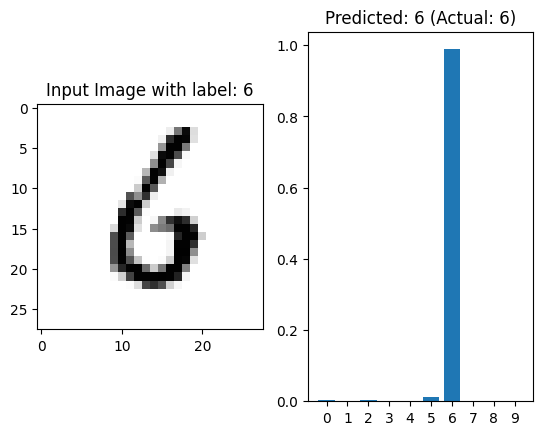

In [30]:
# Test model
# index = int(input("Enter a number (0 - 59999): "))
index = 50  # Lấy hình thứ 50 trong bộ test
img = test_images[index]
label = test_labels[index]

# Plot the input image
plt.subplot(1, 2, 1)
plt.imshow(img.reshape(28, 28), cmap="Greys")
plt.title(f"Input Image with label: {np.argmax(label)}")

# Reshape image for forward propagation
img = img.reshape(784, 1)

# Forward propagation: input -> hidden
h_pre = w_i_h @ img + b_i_h
h = 1 / (1 + np.exp(-h_pre))

# Forward propagation: hidden -> output
o_pre = w_h_o @ h + b_h_o
o = 1 / (1 + np.exp(-o_pre))

print(f"o = {o}")

# Display the output prediction
plt.subplot(1, 2, 2)
plt.bar(range(10), o.flatten())
plt.xticks(range(10))  # Set x-axis ticks to 0-9
plt.title(f"Predicted: {o.argmax()} (Actual: {label.argmax()})")

plt.show()

#### Test model with handwriting image

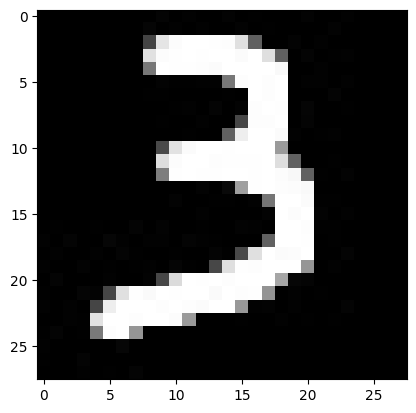

In [31]:
# Load image
import numpy as np
import cv2

img = cv2.imread("so_3.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

# label
label = 3

In [32]:
print(img.shape)

(28, 28)


In [33]:
img[10:20, 10:20]

array([[226, 251, 255, 255, 254, 255, 255, 255, 154,   0],
       [252, 255, 255, 253, 254, 254, 254, 255, 222,  97],
       [254, 255, 254, 254, 255, 255, 254, 255, 252, 248],
       [  0,   0,   3,   0,   9, 159, 254, 255, 253, 252],
       [  3,   0,   0,   1,   1,   0,   2, 117, 255, 255],
       [  0,   0,   2,   0,   0,   0,   0,   3, 255, 252],
       [  0,   0,   1,   0,   0,   3,   2,   0, 255, 255],
       [  0,   4,   2,   1,   0,   0,   0,  97, 255, 255],
       [  1,   0,   0,   4,   1,  73, 224, 255, 251, 252],
       [  5,   1,   0,  71, 223, 254, 253, 255, 255, 255]], dtype=uint8)

In [34]:
img[img <= 5] = 0
img[10:20, 10:20]

array([[226, 251, 255, 255, 254, 255, 255, 255, 154,   0],
       [252, 255, 255, 253, 254, 254, 254, 255, 222,  97],
       [254, 255, 254, 254, 255, 255, 254, 255, 252, 248],
       [  0,   0,   0,   0,   9, 159, 254, 255, 253, 252],
       [  0,   0,   0,   0,   0,   0,   0, 117, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255, 252],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,  97, 255, 255],
       [  0,   0,   0,   0,   0,  73, 224, 255, 251, 252],
       [  0,   0,   0,  71, 223, 254, 253, 255, 255, 255]], dtype=uint8)

In [35]:
# Reshape image for forward propagation
img = img.reshape(784, 1)

In [36]:
# Normalize image
img = img / 255

In [37]:
print(img.shape)
img[210:220]

(784, 1)


array([[0.        ],
       [0.        ],
       [0.99215686],
       [1.        ],
       [0.99607843],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [38]:
# Forward propagation: input -> hidden
h_pre = w_i_h @ img + b_i_h
h = 1 / (1 + np.exp(-h_pre))

# Forward propagation: hidden -> output
o_pre = w_h_o @ h + b_h_o
o = 1 / (1 + np.exp(-o_pre))

print(f"output: {o} \npredict: {np.argmax(o)}")

output: [[3.60090451e-03]
 [6.11587138e-04]
 [9.46088628e-05]
 [9.55157666e-01]
 [1.50725925e-06]
 [6.43318890e-03]
 [8.84062858e-05]
 [3.14274863e-04]
 [1.93493747e-04]
 [8.93614661e-04]] 
predict: 3


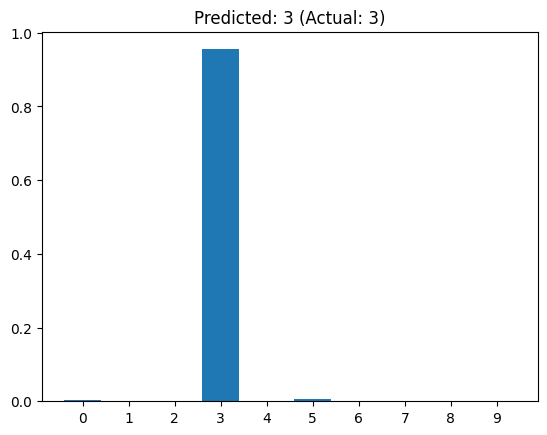

In [39]:
# Display the output prediction
plt.bar(range(10), o.flatten())
plt.xticks(range(10))  # Set x-axis ticks to 0-9
plt.title(f"Predicted: {o.argmax()} (Actual: {label})")
plt.show()

### 4. Complete code

epoch: 1: Tổng số hình: 60000, Dự đoán đúng: 51642
epoch: 1: w_i_h[1, 1]: 0.17552376362566446, b_i_h[0]: [-0.0461233], w_h_o[1, 1]: 0.9682118092300499, b_h_o[0]: [-0.36122919]
epoch: 1: Accuracy: 86.07%

epoch: 2: Tổng số hình: 60000, Dự đoán đúng: 55454
epoch: 2: w_i_h[1, 1]: 0.17552376362566446, b_i_h[0]: [-0.01034711], w_h_o[1, 1]: 1.2633993375755865, b_h_o[0]: [-0.44685396]
epoch: 2: Accuracy: 92.42%

epoch: 3: Tổng số hình: 60000, Dự đoán đúng: 56030
epoch: 3: w_i_h[1, 1]: 0.17552376362566446, b_i_h[0]: [0.03022459], w_h_o[1, 1]: 1.4591397173597207, b_h_o[0]: [-0.50367962]
epoch: 3: Accuracy: 93.38%

o = [[3.84379116e-03]
 [1.66932935e-04]
 [4.80737162e-03]
 [2.75759546e-05]
 [1.06714900e-04]
 [3.86571455e-02]
 [9.73110608e-01]
 [9.79745878e-06]
 [4.94428591e-04]
 [1.76064123e-03]]


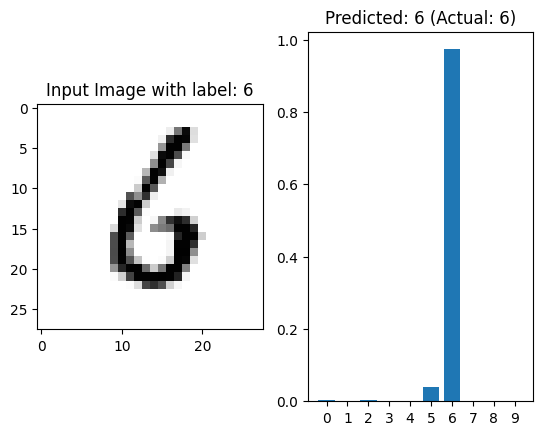

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


# Define the get_mnist function
def get_mnist():
    (train_images, train_labels), (test_images, test_labels) = (
        tf.keras.datasets.mnist.load_data()
    )
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    train_images = train_images.reshape(-1, 28 * 28)
    test_images = test_images.reshape(-1, 28 * 28)
    train_labels = tf.keras.utils.to_categorical(train_labels, 10)
    test_labels = tf.keras.utils.to_categorical(test_labels, 10)
    # images = np.concatenate((train_images, test_images), axis=0)
    # labels = np.concatenate((train_labels, test_labels), axis=0)
    return train_images, train_labels, test_images, test_labels


# Load the data
train_images, train_labels, test_images, test_labels = get_mnist()

# Initialize weights and biases
w_i_h = np.random.uniform(-0.5, 0.5, (20, 784))
b_i_h = np.zeros((20, 1))
w_h_o = np.random.uniform(-0.5, 0.5, (10, 20))
b_h_o = np.zeros((10, 1))

# Training parameters
learn_rate = 0.01
epochs = 3

# Training loop
for epoch in range(epochs):
    nr_correct = 0  # Reset nr_correct at the start of each epoch
    for img, l in zip(train_images, train_labels):
        img = img.reshape(-1, 1)
        l = l.reshape(-1, 1)

        # Forward propagation: input -> hidden
        h_pre = w_i_h @ img + b_i_h
        h = 1 / (1 + np.exp(-h_pre))

        # Forward propagation: hidden -> output
        o_pre = w_h_o @ h + b_h_o
        o = 1 / (1 + np.exp(-o_pre))

        # Cost / Error calculation
        nr_correct = nr_correct + int(np.argmax(o) == np.argmax(l))

        # Backpropagation
        delta_o = o - l
        w_h_o = w_h_o - learn_rate * delta_o @ h.T
        b_h_o = b_h_o - learn_rate * delta_o

        delta_h = w_h_o.T @ delta_o * (h * (1 - h))
        w_i_h = w_i_h - learn_rate * delta_h @ img.T
        b_i_h = b_i_h - learn_rate * delta_h

    # hiển thị một phần các thông số w, h, Accuracy sau mỗi epoch
    print(
        f"epoch: {epoch+1}: Tổng số hình: {len(train_images)}, Dự đoán đúng: {nr_correct}"
    )
    print(
        f"epoch: {epoch+1}: w_i_h[1, 1]: {w_i_h[1, 1]}, b_i_h[0]: {b_i_h[0]}, w_h_o[1, 1]: {w_h_o[1, 1]}, b_h_o[0]: {b_h_o[0]}"
    )
    print(f"epoch: {epoch+1}: Accuracy: {nr_correct / len(train_images) * 100:.2f}%\n")

# Save model to files
np.save("w_i_h.npy", w_i_h)
np.save("b_i_h.npy", b_i_h)
np.save("w_h_o.npy", w_h_o)
np.save("b_h_o.npy", b_h_o)


# Function to load model from files
def load_model():
    w_i_h = np.load("w_i_h.npy")
    b_i_h = np.load("b_i_h.npy")
    w_h_o = np.load("w_h_o.npy")
    b_h_o = np.load("b_h_o.npy")
    return w_i_h, b_i_h, w_h_o, b_h_o


# Load model
w_i_h, b_i_h, w_h_o, b_h_o = load_model()

# Show result
# Test model
# index = int(input("Enter a number (0 - 59999): "))
index = 50  # Lấy hình thứ 50 trong bộ test
img = test_images[index]
label = test_labels[index]

# Plot the input image
plt.subplot(1, 2, 1)
plt.imshow(img.reshape(28, 28), cmap="Greys")
plt.title(f"Input Image with label: {np.argmax(label)}")

# Reshape image for forward propagation
img = img.reshape(784, 1)

# Forward propagation: input -> hidden
h_pre = b_i_h + w_i_h @ img
h = 1 / (1 + np.exp(-h_pre))

# Forward propagation: hidden -> output
o_pre = b_h_o + w_h_o @ h
o = 1 / (1 + np.exp(-o_pre))

print(f"o = {o}")

# Display the output prediction
plt.subplot(1, 2, 2)
plt.bar(range(10), o.flatten())
plt.xticks(range(10))  # Set x-axis ticks to 0-9
plt.title(f"Predicted: {o.argmax()} (Actual: {label.argmax()})")

plt.show()

### 5. So sánh mô hình

#### Common Plot Func

In [41]:
# Hàm vẽ hình và kết quả dự đoán
def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        f"predicted_label: {predicted_label}\ntrue_label:{true_label}", color=color
    )


def plot_value_array(predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

#### Mạng MLP

Epoch 1/5


c:\Users\HUYNGUYEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 675us/step - accuracy: 0.8769 - loss: 0.4231 - val_accuracy: 0.9600 - val_loss: 0.1295
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - accuracy: 0.9670 - loss: 0.1104 - val_accuracy: 0.9712 - val_loss: 0.0944
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.9769 - loss: 0.0721 - val_accuracy: 0.9733 - val_loss: 0.0827
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.9832 - loss: 0.0529 - val_accuracy: 0.9760 - val_loss: 0.0753
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.9867 - loss: 0.0396 - val_accuracy: 0.9755 - val_loss: 0.0781


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.9718 - loss: 0.0933
Test accuracy: 0.9754999876022339
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step


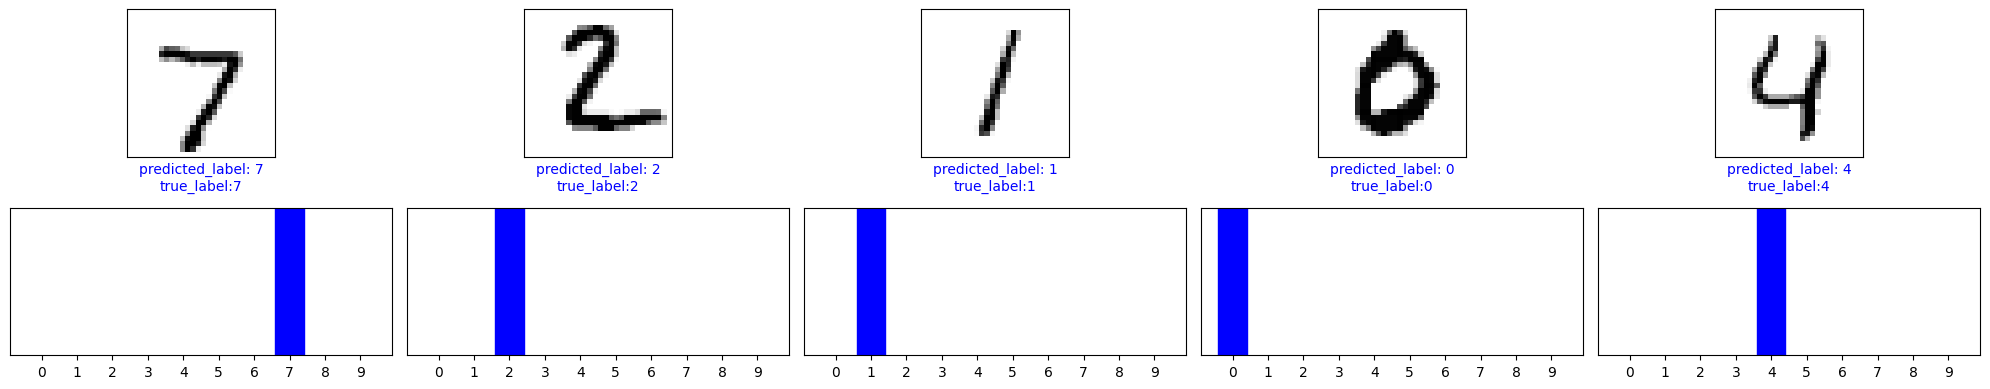

In [42]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load dữ liệu MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Xây dựng mô hình MLP
model = models.Sequential(
    [
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

# Biên dịch mô hình
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Lưu model thành file (tạo checkpoint)
model.save("model.weights.784i.20h.10o.h5")

# Đánh giá mô hình
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Kiểm thử một vài hình
predictions = model.predict(x_test)

# Vẽ kết quả của 5 hình đầu tiên
num_images = 5
plt.figure(figsize=(2 * 2 * num_images, 4))
for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plot_image(predictions[i], y_test[i], x_test[i].reshape(28, 28))
    plt.subplot(2, num_images, i + 1 + num_images)
    plot_value_array(predictions[i], y_test[i])
plt.tight_layout()
plt.show()

#### Mạng CNN

Epoch 1/5


c:\Users\HUYNGUYEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8988 - loss: 0.3273 - val_accuracy: 0.9857 - val_loss: 0.0417
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9843 - loss: 0.0494 - val_accuracy: 0.9873 - val_loss: 0.0371
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9898 - loss: 0.0339 - val_accuracy: 0.9885 - val_loss: 0.0350
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9928 - loss: 0.0229 - val_accuracy: 0.9921 - val_loss: 0.0271
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9944 - loss: 0.0189 - val_accuracy: 0.9914 - val_loss: 0.0249
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.9889 - loss: 0.0314
Test accuracy: 0.9914000034332275
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step


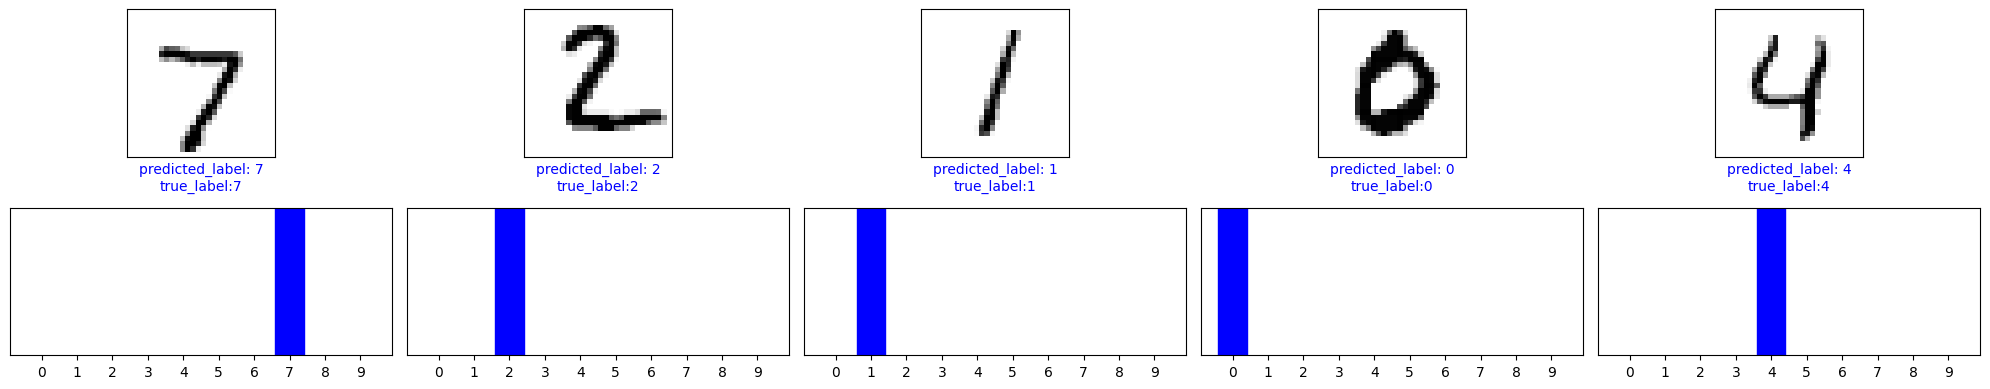

In [43]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load dữ liệu MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape dữ liệu cho CNN
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Xây dựng mô hình CNN
model = models.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

# Biên dịch mô hình
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Đánh giá mô hình
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Kiểm thử một vài hình
predictions = model.predict(x_test)

# Vẽ kết quả của 5 hình đầu tiên
num_images = 5
plt.figure(figsize=(2 * 2 * num_images, 4))
for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plot_image(predictions[i], y_test[i], x_test[i].reshape(28, 28))
    plt.subplot(2, num_images, i + 1 + num_images)
    plot_value_array(predictions[i], y_test[i])
plt.tight_layout()
plt.show()

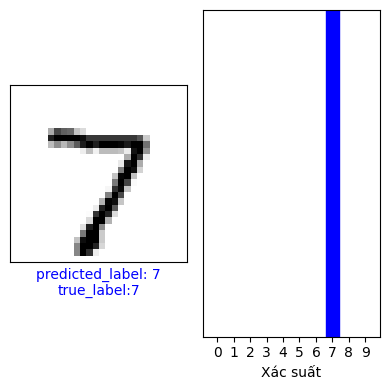

In [44]:
# Vẽ kết quả của hình đầu tiên
plt.figure(figsize=(4, 4))
plt.subplot(1, 2, 1)
plot_image(predictions[0], y_test[0], x_test[0].reshape(28, 28))

plt.subplot(1, 2, 2)
plot_value_array(predictions[0], y_test[0])
plt.xlabel("Xác suất")

plt.tight_layout()
plt.show()